 Детальная и комплексная кластеризация спиртных напитков объемом 0.7 л, которые продаются в сети ["КуулКлевер"](https://www.coolclever.ru/catalog/otdokhni/all?filters=11099%255B0%255D%3D10%2611099%255B1%255D%3D11%2611099%255B2%255D%3D9%2611099%255B3%255D%3D12%2611099%255B4%255D%3D17%2611099%255B5%255D%3D13%2611099%255B6%255D%3D14%2611099%255B7%255D%3D15%2611099%255B8%255D%3D16%2611099%255B9%255D%3D43%2611109%255B0%255D%3D0.700&sort=cheap&page=9), с помощью различных методов машинного обучения.


In [707]:
# Объявляю нужные библиотеки
import pandas as pd # Библиотека для работы с фреймворками
import matplotlib.pyplot as plt # Библиотека для визуализации данных
import seaborn as sns # Библиотека для визуализации данных
from sklearn.preprocessing import LabelEncoder # Объект разметки текстовых данных

In [708]:
# Загрузка датасета из csv-файла
df = pd.read_csv('CoolClever.csv', sep=',')
df

,Напиток,Цена,Страна,Крепость,Выдержка,Подарочная упаковка
0,Водка,490,Россия,40.0,0.0,0
1,Водка,490,Россия,40.0,0.0,0
2,Водка,490,Россия,40.0,0.0,0
3,Водка,539,Россия,40.0,0.0,0
4,Водка,539,Россия,40.0,0.0,0
...,...,...,...,...,...,...
201,Коньяк,36000,Франция,41.2,29.0,1
202,Коньяк,40000,Франция,41.6,30.0,0
203,Коньяк,50000,Франция,42.3,35.0,1
204,Виски,59000,Шотландия,46.7,25.0,1


In [709]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Напиток              206 non-null    object 
 1   Цена                 206 non-null    int64  
 2   Страна               206 non-null    object 
 3   Крепость             206 non-null    float64
 4   Выдержка             206 non-null    float64
 5   Подарочная упаковка  206 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 9.8+ KB


Перед кластеризацией необходимо провести комлпексный и детальный анализ данных, собранных в таблице, чтобы выявить имеющиеся закономерности.

In [710]:
# Описание датасета
df.describe()

,Цена,Крепость,Выдержка,Подарочная упаковка
count,206.000000,206.000000,206.000000,206.000000
mean,6743.873786,41.543689,7.104369,0.500000
std,9124.039502,5.170275,9.361834,0.501218
min,490.000000,17.000000,0.000000,0.000000
25%,1992.250000,40.000000,2.000000,0.000000
50%,3490.000000,40.000000,4.000000,0.500000
75%,7775.000000,42.000000,10.000000,1.000000
max,59000.000000,58.900000,57.000000,1.000000


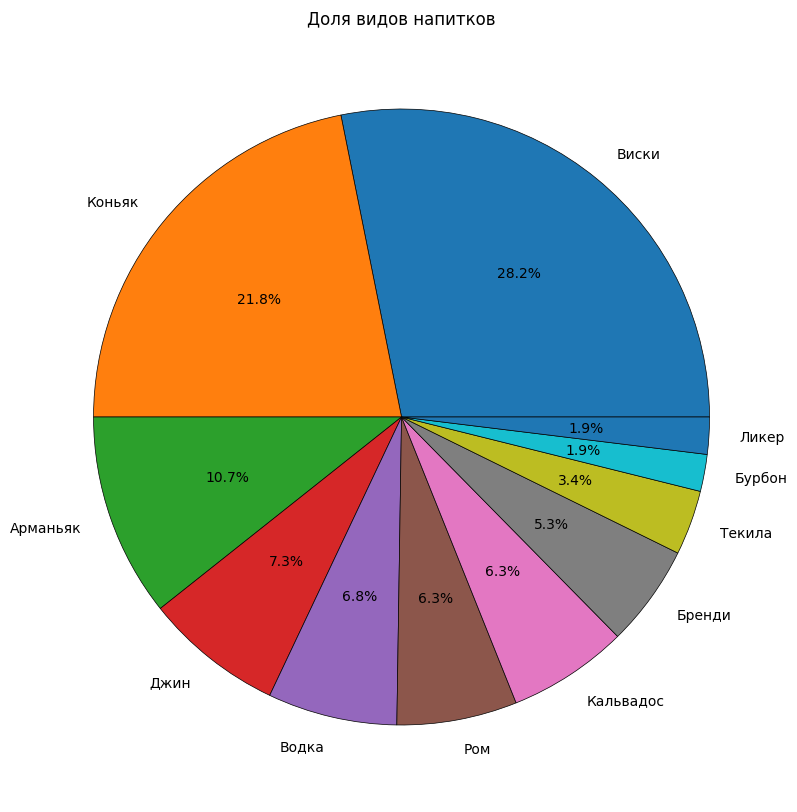

In [711]:
# Доля видов напитков в таблице
plt.figure(figsize=(10,10))
df['Напиток'].value_counts().plot.pie(
    autopct='%.1f%%',
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 0.5,
        'linestyle': '-'}
    )
plt.title('Доля видов напитков')
plt.ylabel('')
plt.show()

Почти половину (49%) портфеля напитков занимают виски и коньяк.

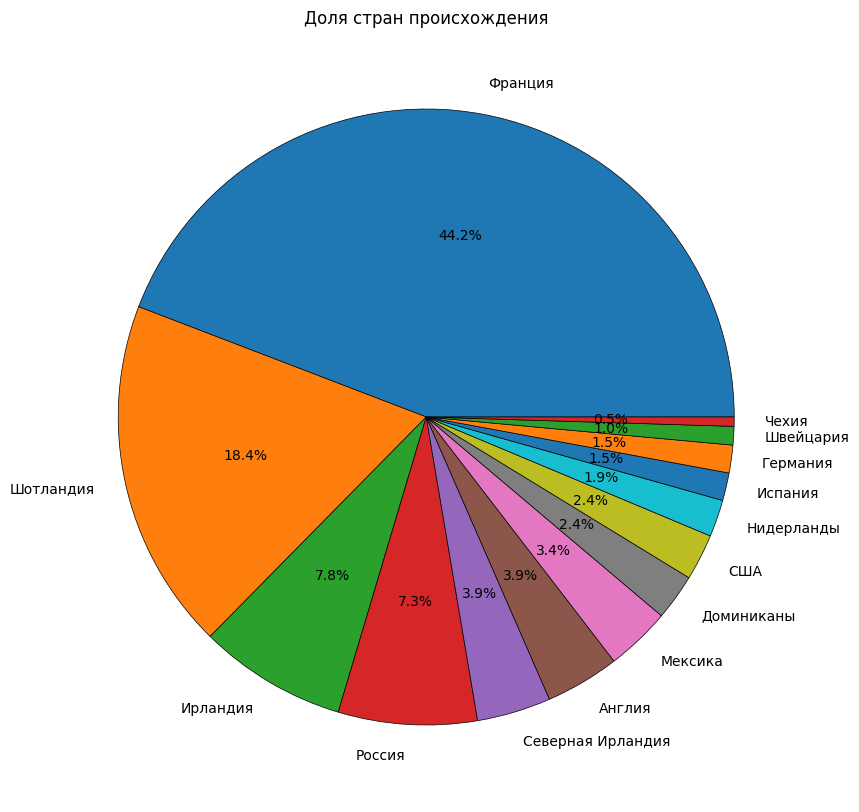

In [712]:
# Доля стран в напитке
plt.figure(figsize=(10,10))
df['Страна'].value_counts().plot.pie(
    autopct='%.1f%%',
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 0.5,
        'linestyle': '-'}
    )
plt.title('Доля стран происхождения')
plt.ylabel('')
plt.show()

На отечественные напитки приходится лишь 7.3% от всего портфеля. В то же время большая часть ассортимента импортируется из Франции (44.2%).

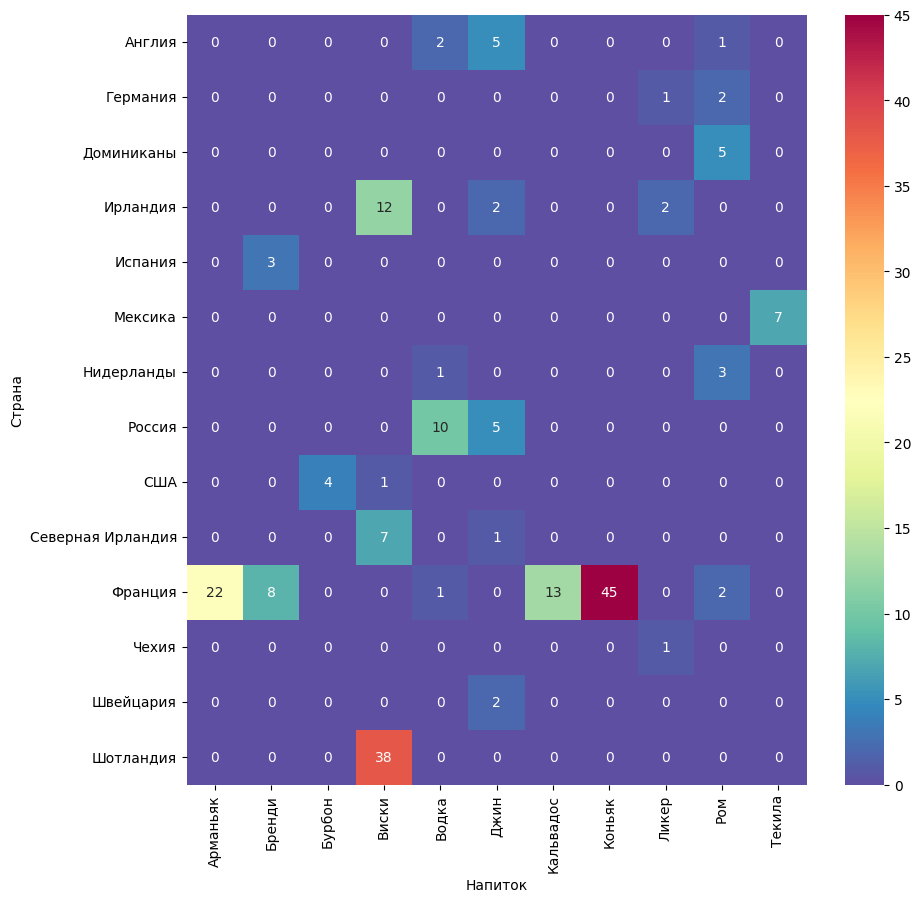

In [713]:
# Связь между видом напитков и страной происхождения 
cross_tab = pd.crosstab(df['Страна'],df['Напиток']) # Таблица сопряженности между видом напитка и страной происхождения
#
# Тепловая карта сопряженности
plt.figure(figsize=(10,10))
sns.heatmap(cross_tab, annot=True, cmap='Spectral_r')
plt.show()

Франция является лидером в плане коньяка, арманьяка и бренди. Шотландия существенным образом опережает Ирландию и Северную Ирландию по виски. Единственным поставщиком текилы является Мексика. Доминиканы заметным образом не опережают другие страны по рому. Отечественный сегмент огранен водкой и джином.

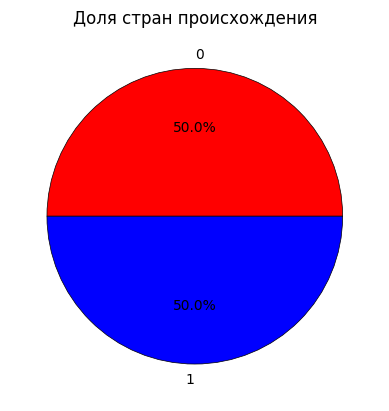

In [714]:
# Доля подарочных версий
df['Подарочная упаковка'].value_counts().plot.pie(
    autopct='%.1f%%',
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 0.5,
        'linestyle': '-'},
        colors = ['red','blue']
    )
plt.title('Доля стран происхождения')
plt.ylabel('')
plt.show()

Половину из представленного ассортимента составляют подарочные версии.

In [ ]:
# Распределение годов выдержки
df['Выдержка'].value_counts().plot.hist()

AttributeError: 'function' object has no attribute 'plot'

In [ ]:
# Разметка текстовых данных в таблице
le = LabelEncoder()
df['Напиток'] = le.fit_transform(df['Напиток'])
df['Страна'] = le.fit_transform(df['Страна'])
df

,Напиток,Цена,Страна,Крепость,Выдержка,Подарочная упаковка
0,4,490,7,40.0,0.0,0
1,4,490,7,40.0,0.0,0
2,4,490,7,40.0,0.0,0
3,4,539,7,40.0,0.0,0
4,4,539,7,40.0,0.0,0
...,...,...,...,...,...,...
201,7,36000,10,41.2,29.0,1
202,7,40000,10,41.6,30.0,0
203,7,50000,10,42.3,35.0,1
204,3,59000,13,46.7,25.0,1
